In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [21]:
@staticmethod
def factor(df, short_period=12, long_period=26):
    '''
    衡量MACD的过滤器
    '''
    short_ema = df['close'].ewm(span=short_period, adjust=False).mean()
    long_ema = df['close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    return macd

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.003212
   Rank_IC (Spearman): -0.028889
📊 信息比率:
   IR: -0.045649
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 131035
   因子列: factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


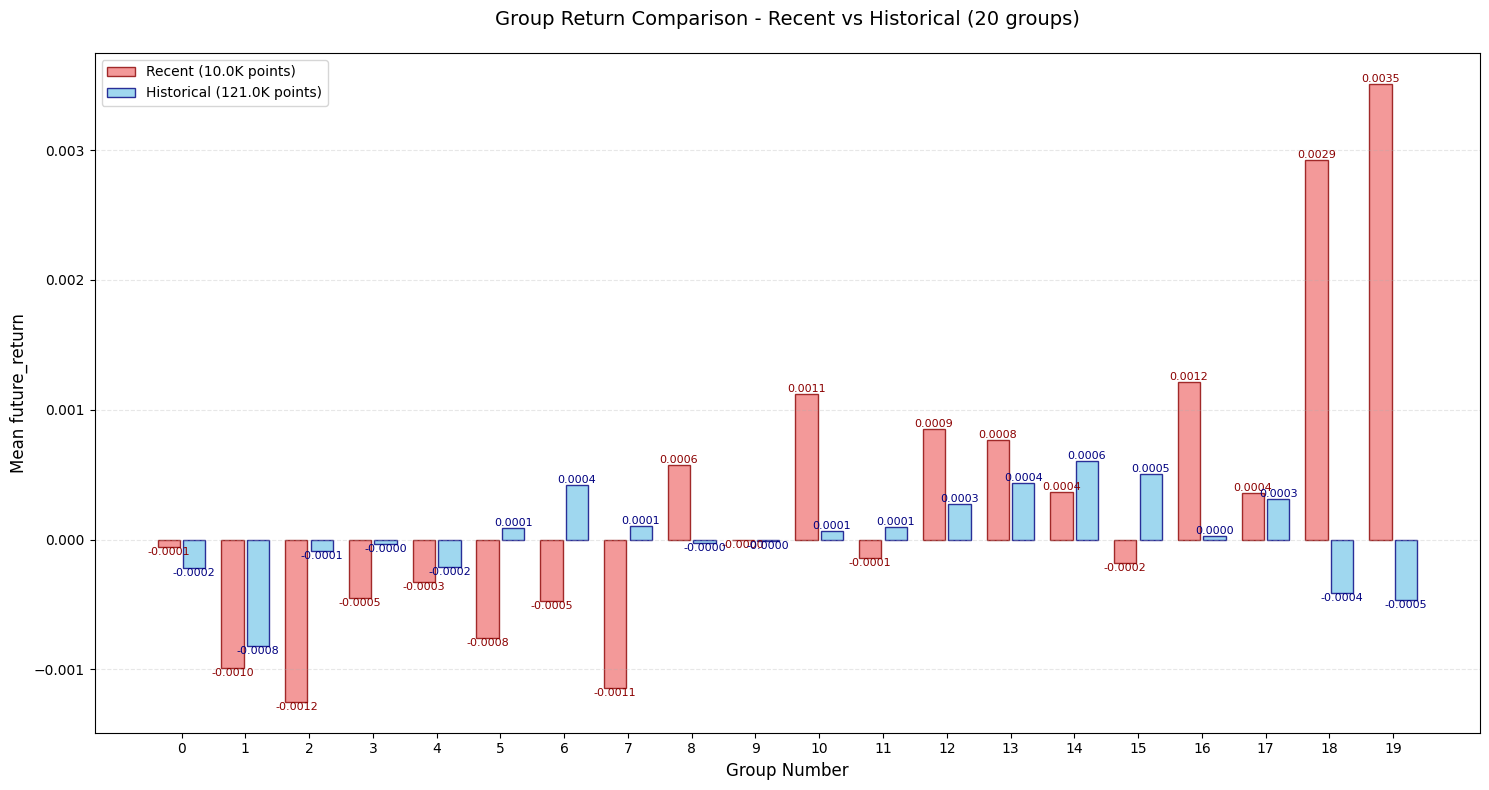

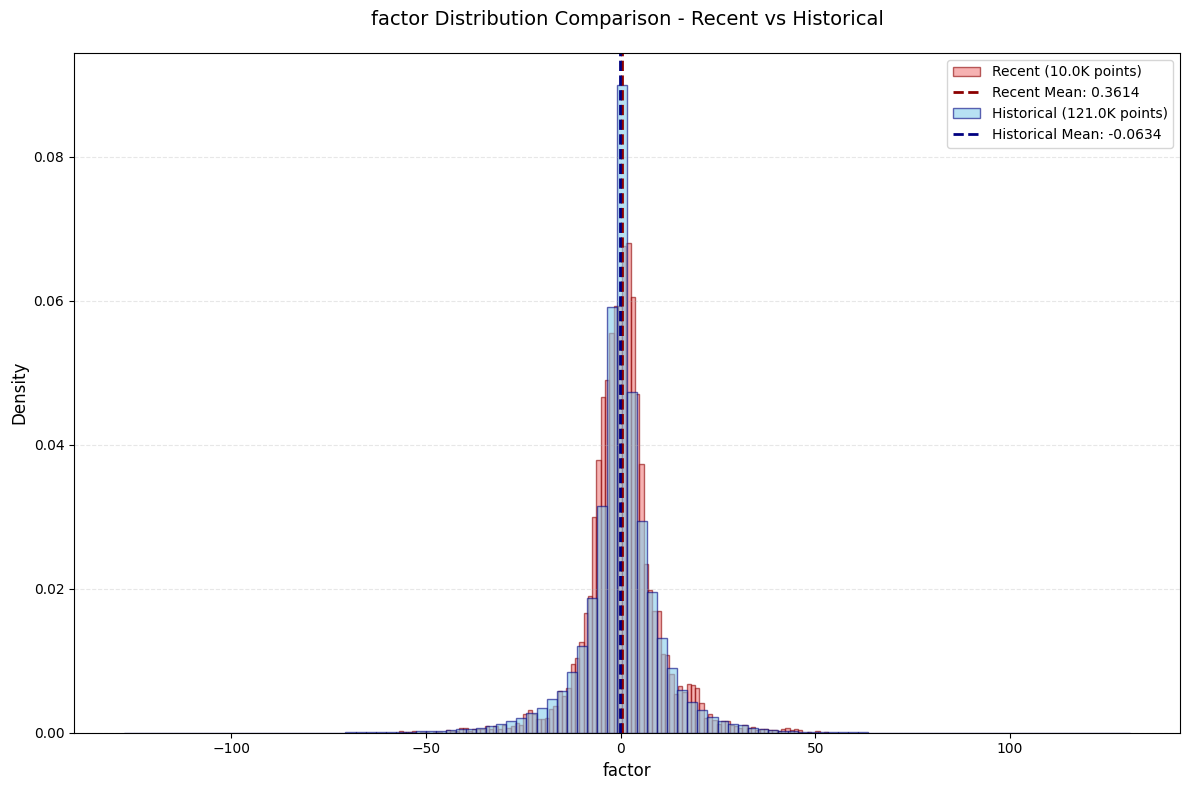

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [22]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

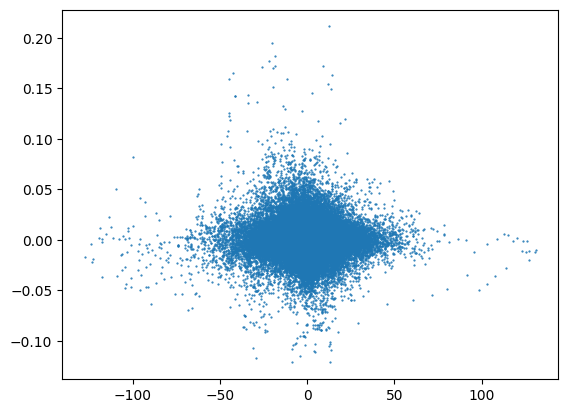

In [23]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [24]:
result['information_ratio']['group_correlations']
# 这表示不同分组之间的相关性，通常用于评估因子在不同市场状态下的表现一致性。
# 如果相关性较高，说明因子在不同市场状态下表现一致；如果相关性较低，说明因子在不同市场状态下表现差异较大。

[-0.05630223468169615,
 0.001814959461590509,
 0.020564566763809654,
 -0.00762566837179895,
 -0.0005307046819867495,
 0.002469732779101957,
 0.015935008432871236,
 -0.012867932705368061,
 0.010050139938950835,
 0.016856018071355942]

In [25]:
print(result)

{'correlation_analysis': {'IC': 0.0032123111194325015, 'Rank_IC': -0.02888869582852508}, 'information_ratio': {'IR': -0.04564868642682902, 'group_correlations': [-0.05630223468169615, 0.001814959461590509, 0.020564566763809654, -0.00762566837179895, -0.0005307046819867495, 0.002469732779101957, 0.015935008432871236, -0.012867932705368061, 0.010050139938950835, 0.016856018071355942], 'n_groups': 10}, 'group_analysis': {'group_stats':         val_min  val_max  val_mean  return_mean  return_std  count
group                                                             
0     -127.5075 -16.7462  -27.8437      -0.0002      0.0197   6552
1      -16.7432 -10.1878  -12.9950      -0.0009      0.0148   6552
2      -10.1875  -6.9760   -8.4238      -0.0002      0.0137   6552
3       -6.9754  -4.9795   -5.9139      -0.0001      0.0116   6551
4       -4.9794  -3.5980   -4.2598      -0.0003      0.0107   6552
5       -3.5980  -2.5475   -3.0496       0.0001      0.0105   6552
6       -2.5473  -1.6817   